In [5]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use('seaborn-muted')
import matplotlib.ticker as mtick
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# load data
df = pd.read_csv('WindTurbineDesignHypervolumeBestRun15kFE.csv')

# get max hv for each alg
dfmax = df.iloc[[-1]].transpose()
dfmax.columns = ['median']
dfmax = dfmax.drop('FE', axis=0)

# ranking
dfmax.sort_values(by='median', ascending=False)

,median
HHCO,5.199597
CHHLA,5.059063


In [6]:
# config

labels={
    "HHCO":   "(1st) HH-CO",
    "CHHLA":  "(2nd) HH-LA",
}

colors={
    "HHCO": "k", # black
    "CHHLA": "tab:gray",
}

styles={ # dashed lines for HHs 
    "HHCO": "--",
    "CHHLA": "--",
}

In [7]:
# plot hypervolume during the search

def plot_hypervolume(algs, figname, others='others', legend_outside=True):

    f = plt.figure(figsize=(10, 5))
    ax = f.gca()

    # axins = ax.inset_axes([0.45, 0.17, 0.33, 0.40]) # axis internal box (in %)
    # # sub region of the original image
    # x1, x2, y1, y2 = 8500, 9900, 4.2, 5
    # axins.set_xlim(x1, x2)
    # axins.set_ylim(y1, y2)
    
    df["FE"]

    i=0
    for alg in algs:
        df.plot(x="FE", y=alg, ax=ax, legend=False, style=styles[alg], color=colors[alg], label=labels[alg])
    #    df.plot(x="FE", y=alg, ax=axins, legend=False, style=styles[alg], color=colors[alg], label=labels[alg])
        i+=1
    ax.set_xlim(-0.1, 15120)

    plt.plot(1*210, 0, 'o', color='tab:gray', label='Initialization %s'%(others))
    plt.plot(9*210, 0, 'o', color='k', label="Initialization HH-CO")
    
    axhandles, axlabels = ax.get_legend_handles_labels()
    if legend_outside:
        ax.legend(axhandles[::-1], axlabels[::-1], title='', loc='best', bbox_to_anchor=(1, 1.0))
    else:
        ax.legend(axhandles[::-1], axlabels[::-1], title='', loc='best')
        
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    # ax.xaxis.set_major_locator(MultipleLocator(5))
    
    
    # ax.indicate_inset_zoom(axins)

    plt.xlabel('Fitness Evaluation', fontsize=14)
    plt.ylabel('Hypervolume', fontsize=14)
    plt.tight_layout()
    plt.show()
    f.savefig(figname)

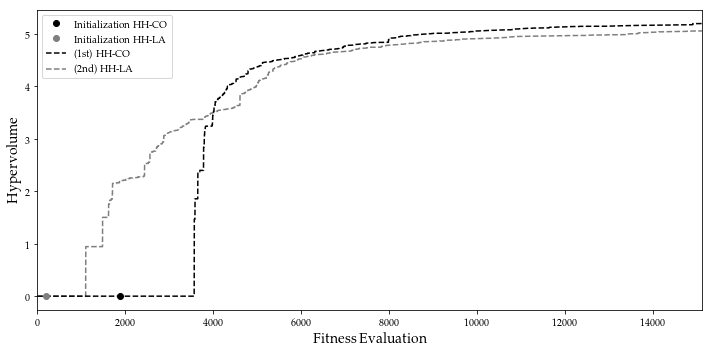

In [8]:
plot_hypervolume(
    ["CHHLA", "HHCO"],
    "hvallbest15kfe.pdf",
    others="HH-LA",
    legend_outside=False
)